# Proyecto 03 - Sistemas de Recomendaci√≥n

###### Disponible en: https://github.com/polo-edgard/SR

## Dataset: STEAM

**Recuerda descargar el dataset de [aqu√≠](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de informaci√≥n sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deber√°s** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deber√°s prestar atenci√≥n (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir c√≥digo que tarde en correr.

### Exploraci√≥n de datos

Ded√≠cale un buen tiempo a hacer un An√°lisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¬øcu√°les son los juegos m√°s populares?¬øY los menos populares?

### Filtro Colaborativo

Deber√°s implementar un sistema de recomendaci√≥n colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Eval√∫a de forma apropiada sus resultados. Justifica la m√©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperpar√°metros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o √≠ndice de Jaccard. ¬øPuedes utilizar los m√©todos de la librer√≠a Surprise? Si no es as√≠, busca implementaciones (por ejemplo, nuevas librer√≠as) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la cr√≠tica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¬øC√≥mo har√≠as para ponerle un valor a la calificaci√≥n?
1. ¬øC√≥mo har√≠as para agregar contenido? Por ejemplo, cuentas con el g√©nero, precio, fecha de lanzamiento y m√°s informaci√≥n de los juegos.
1. ¬øHay algo que te gustar√≠a investigar o probar?

### **¬°T√≥mate tiempo para investigar y leer mucho!**

In [1]:
# Importar librer√≠as
import gzip
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


def parse(path):   
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
# Primeras instancias dataset data_reviews
print("Las cinco primeras instancias son:")
data_reviews.head()

Las cinco primeras instancias son:


username  hours  products product_id  page_order        date  \
0     Chaos Syren    0.1      41.0     725280           0  2017-12-17   
1         Ariman1   13.2    1386.0     328100           2  2017-08-02   
2     freakfantom    0.1    1706.0     725280           5  2017-11-12   
3  The_Cpt_FROGGY    7.8    2217.0     631920           0  2017-12-11   
4    the_maker988    8.2      18.0      35140           7  2018-01-02   

                                                text  early_access  page  \
0  This would not be acceptable as an entertainme...         False     1   
1  Addictive RPG ! Works fine on linux though it ...         False     1   
2   –ü—Ä–∏–∫–æ–ª—å–Ω–∞—è —Å—Ç—Ä–µ–ª—è–ª–∫–∞. –í–∑—è–ª –¥–µ—à–µ–≤–æ –Ω–∞ —Ä–∞—Å–ø—Ä–æ–¥–∞–∂–µ.         False     1   
3  Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...         False     1   
4  This game was way to linear for me, and compar...         False     1   

             user_id               compensation  found_funny  
0                NaN                        NaN          NaN  
1                NaN                        NaN          NaN  
2                NaN                        NaN          NaN  
3  76561198003030375  Product received for free          NaN  
4  76561198353396844                        NaN          NaN

In [5]:
data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

**Games**

In [6]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [7]:
# Primeras instancias dataset data_games
print("Las cinco primeras instancias son:")
data_games.head()

Las cinco primeras instancias son:


publisher                                             genres  \
0         Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
1  Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
2      Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
3              ÂΩºÂ≤∏È¢ÜÂüü                        [Action, Adventure, Casual]   
4               NaN                                                NaN   

                  app_name                    title  \
0      Lost Summoner Kitty      Lost Summoner Kitty   
1                Ironbound                Ironbound   
2  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                  ÂºπÁÇ∏‰∫∫2222                  ÂºπÁÇ∏‰∫∫2222   
4            Log Challenge                      NaN   

                                                 url release_date  \
0  http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...   2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...   2017-07-24   
3     http://store.steampowered.com/app/767400/2222/   2017-12-07   
4  http://store.steampowered.com/app/773570/Log_C...          NaN   

                                                tags  discount_price  \
0      [Strategy, Action, Indie, Casual, Simulation]            4.49   
1  [Free to Play, Strategy, Indie, RPG, Card Game...             NaN   
2  [Free to Play, Simulation, Sports, Casual, Ind...             NaN   
3                        [Action, Adventure, Casual]            0.83   
4                    [Action, Indie, Casual, Sports]            1.79   

                                         reviews_url  \
0  http://steamcommunity.com/app/761140/reviews/?...   
1  http://steamcommunity.com/app/643980/reviews/?...   
2  http://steamcommunity.com/app/670290/reviews/?...   
3  http://steamcommunity.com/app/767400/reviews/?...   
4  http://steamcommunity.com/app/773570/reviews/?...   

                                               specs         price  \
0                                    [Single-player]          4.99   
1  [Single-player, Multi-player, Online Multi-Pla...  Free To Play   
2  [Single-player, Multi-player, Online Multi-Pla...  Free to Play   
3                                    [Single-player]          0.99   
4  [Single-player, Full controller support, HTC V...          2.99   

   early_access      id         developer        sentiment metascore  
0         False  761140         Kotoshiro              NaN       NaN  
1         False  643980  Secret Level SRL  Mostly Positive       NaN  
2         False  670290      Poolians.com  Mostly Positive       NaN  
3         False  767400              ÂΩºÂ≤∏È¢ÜÂüü              NaN       NaN  
4         False  773570               NaN              NaN       NaN

In [8]:
data_games[data_games.id == '35140']

publisher               genres  \
31617  Warner Bros. Interactive Entertainment, Feral ...  [Action, Adventure]   

                                             app_name  \
31617  Batman: Arkham Asylum Game of the Year Edition   

                                                title  \
31617  Batman: Arkham Asylum Game of the Year Edition   

                                                     url release_date  \
31617  http://store.steampowered.com/app/35140/Batman...   2010-03-26   

                                                    tags  discount_price  \
31617  [Action, Batman, Stealth, Adventure, Third Per...             NaN   

                                             reviews_url  \
31617  http://steamcommunity.com/app/35140/reviews/?b...   

                                                   specs  price  early_access  \
31617  [Single-player, Steam Achievements, Steam Trad...  19.99         False   

          id                                   developer  \
31617  35140  Rocksteady Studios,Feral Interactive (Mac)   

                     sentiment metascore  
31617  Overwhelmingly Positive        91

### -Parte A - Exploraci√≥n de Datos.

In [9]:
# N√∫mero de filas y columnas del dataset data_reviews
print("El dataset tiene {} filas".format(data_reviews.shape[0]))
print("El dataset tiene {} columnas".format(data_reviews.shape[1]))

El dataset tiene 779307 filas
El dataset tiene 12 columnas


In [10]:
# N√∫mero de filas y columnas del dataset data_games
print("El dataset tiene {} filas".format(data_games.shape[0]))
print("El dataset tiene {} columnas".format(data_games.shape[1]))

El dataset tiene 32135 filas
El dataset tiene 16 columnas


In [11]:
# Nombre de las columnas
print("los nombres de las columnas de data_reviews son")
print(list(data_reviews.columns.values))

print("los nombres de las columnas de data_games son")
print(list(data_games.columns.values))

los nombres de las columnas de data_reviews son
['username', 'hours', 'products', 'product_id', 'page_order', 'date', 'text', 'early_access', 'page', 'user_id', 'compensation', 'found_funny']
los nombres de las columnas de data_games son
['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'discount_price', 'reviews_url', 'specs', 'price', 'early_access', 'id', 'developer', 'sentiment', 'metascore']


In [12]:
# Valores faltantes por cada columna en data_reviews
missing_values_count = data_reviews.isnull().sum()
print("los valores faltantes de cada una de las columnas son")
print(missing_values_count[0:12])

los valores faltantes de cada una de las columnas son
username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64


In [13]:
# Valores faltantes por cada columna en data_games
missing_values_count = data_games.isnull().sum()
print("los valores faltantes de cada una de las columnas son")
print(missing_values_count[0:16])

los valores faltantes de cada una de las columnas son
publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64


In [14]:
# Porcentaje de valores faltantes data_reviews
total_cells = np.product(data_reviews.shape)
total_missing = missing_values_count.sum()
print("El porcentaje de valores faltantes en data_reviews sobre el total de los valores es de", round(total_missing / total_cells*100, 2), "%")

El porcentaje de valores faltantes en data_reviews sobre el total de los valores es de 0.96 %


In [15]:
# Porcentaje de valores faltantes data_games
total_cells = np.product(data_games.shape)
total_missing = missing_values_count.sum()
print("El porcentaje de valores faltantes en data_games sobre el total de los valores es de", round(total_missing / total_cells*100, 2), "%")

El porcentaje de valores faltantes en data_games sobre el total de los valores es de 17.41 %


In [16]:
# Duplicados del DataFrame data_reviews
print("El n√∫mero de registros duplicados son: {}".format(data_reviews.duplicated().sum()))

El n√∫mero de registros duplicados son: 0


In [17]:
# Lista de publicadores de juegos
print("Hay {} publicadores de juegos".format(len(data_games["publisher"].unique())))
print ("Los cu√°les son {}".format(list(data_games["publisher"].unique())))

Hay 8240 publicadores de juegos
Los cu√°les son ['Kotoshiro', 'Making Fun, Inc.', 'Poolians.com', 'ÂΩºÂ≤∏È¢ÜÂüü', nan, 'Trickjump Games Ltd', 'Poppermost Productions', 'RewindApp', 'Qucheza', 'Stegalosaurus Game Development', 'Copperpick Studio', 'Ghulam Jewel', 'Apillo', 'Tero Lunkka', 'FrozenPepper', 'Casey Labrack', 'Stainless Games Ltd', 'Valve', 'dev4play', 'BlueLine Games', 'Games by Brundle', 'ETGgames', 'ProjectorGames', 'Unknown Indie Devs', 'Cisamid Inc.', 'Strategy First', 'Blazing Griffin Ltd.', 'Zachary M Thomas', 'Breakout Studio', 'zha7', 'Ultraint', 'Seth Albertus', 'TPM.CO SOFT WORKS', 'Wonderbox Games', 'Mad Unicorn Games', 'Majesco', 'Introversion Software', 'SimBin', 'Unknown Worlds Entertainment', 'CINEMAX, s.r.o.', 'Funcom', 'Capcom', '2K Games', 'Arkane Studios', '2K Games, Feral Interactive (Mac)', 'Square Enix, Feral Interactive (Mac)', 'Telltale Games', 'id Software', 'THQ Nordic', 'SEGA', 'Big Fish Games', 'Rockstar Games', 'Square Enix', 'Electronic Arts', '

In [18]:
# Lista de juegos
print("Hay {} juegos".format(len(data_games["app_name"].unique())))
print ("Los cu√°les son {}".format(list(data_games["app_name"].unique())))

Hay 32095 juegos
Los cu√°les son ['Lost Summoner Kitty', 'Ironbound', 'Real Pool 3D - Poolians', 'ÂºπÁÇ∏‰∫∫2222', 'Log Challenge', 'Battle Royale Trainer', 'SNOW - All Access Basic Pass', 'SNOW - All Access Pro Pass', 'SNOW - All Access Legend Pass', 'Race', 'Uncanny Islands', 'Icarus Six Sixty Six', 'Army of Tentacles: (Not) A Cthulhu Dating Sim: Black GOAT of the Woods Edition', 'Beach Rules', 'Planetarium 2 - Zen Odyssey', 'The first thrust of God', 'SNOW - Starter Pack', 'The first thrust of God - All Aircrafts', 'SNOW - Lifetime Pack', 'After Life VR', 'Kitty Hawk', 'The Warrior Of Treasures', 'Mortars VR', 'RC Plane 3 - Canyon Scenario', 'RC Plane 3 - F-53B', 'DinoBlaster', 'Robotpencil Presents: Understanding 3D for Concept', 'Carmageddon Max Pack', 'Half-Life', 'Fallen Mage', "Don't Get Hit In The Face", 'Lost Cities', 'Twisted Enhanced Edition', 'Vaporwave Simulator', 'Tactics Forever', 'Christmas Santa Troubles', 'Kingdom Watcher', 'Underdone - Soundtrack', 'Bitcoin Clicker',

 ##### ¬øCu√°les son los juegos m√°s populares? ¬øY los menos populares?
 
 ###### Consideraciones preliminares

In [19]:
# Preliminarmente tomaremos como m√°s populares los m√°s comentados en data_reviews
top = 10
tabla = data_reviews.product_id.value_counts().iloc[:top]
a = []
for i in tabla.index:
    a.append(list(data_games.app_name[data_games.id == i]))
print("El top {} de juegos m√°s populares son: {}".format(top, a))

El top 10 de juegos m√°s populares son: [['Team Fortress 2'], ['Rust'], ['Borderlands 2'], ['Fallout 4'], ['Grand Theft Auto V'], ['Undertale'], ['Warframe'], ['Portal 2'], ['DayZ'], ['Robocraft']]


In [20]:
# Tomaremos como menos populares los menos comentados en data_reviews y en su estricta posici√≥n
# Hay muchos con un comentario
bottom = 10
tabla2 = data_reviews.product_id.value_counts().iloc[-bottom:]
b = []
for i in tabla2.index:
    b.append(list(data_games.app_name[data_games.id == i]))
print("El top {} de juegos menos populares son: {}".format(bottom, b))

El top 10 de juegos menos populares son: [['Inferno Puzzle'], ["Fabulous - Angela's High School Reunion"], ['Unlocked: The World of Games, Revealed'], ['Tail Drift'], ['Chernobyl: Terrorist Attack'], ['Equalizer'], ['Boneless Zombie'], ['Lost Cosmonaut'], ['Zipple World 2: The Sweet Chaos'], ['Grav Blazer']]


In [21]:
# Identificamos los tipos de datos del dataset
data_reviews.dtypes

username         object
hours           float64
products        float64
product_id       object
page_order        int64
date             object
text             object
early_access       bool
page              int64
user_id          object
compensation     object
found_funny     float64
dtype: object

In [22]:
# Convertimos tipo de dato para columna date
data_reviews['date'] = pd.to_datetime(data_reviews['date'])

In [23]:
print(data_reviews.date.min())
print(data_reviews.date.max())

2010-10-15 00:00:00
2018-01-05 00:00:00


In [24]:
data_reviews.dtypes

username                object
hours                  float64
products               float64
product_id              object
page_order               int64
date            datetime64[ns]
text                    object
early_access              bool
page                     int64
user_id                 object
compensation            object
found_funny            float64
dtype: object

In [25]:
# Descartar columnas poco informativas
data_reviews = pd.DataFrame(data_reviews, columns=[
                            'username', 'hours', 'product_id', 'date', 'text'])
data_reviews.dtypes

username              object
hours                float64
product_id            object
date          datetime64[ns]
text                  object
dtype: object

In [26]:
print(data_reviews.shape)
data_reviews.head()

(779307, 5)


username  hours product_id       date  \
0     Chaos Syren    0.1     725280 2017-12-17   
1         Ariman1   13.2     328100 2017-08-02   
2     freakfantom    0.1     725280 2017-11-12   
3  The_Cpt_FROGGY    7.8     631920 2017-12-11   
4    the_maker988    8.2      35140 2018-01-02   

                                                text  
0  This would not be acceptable as an entertainme...  
1  Addictive RPG ! Works fine on linux though it ...  
2   –ü—Ä–∏–∫–æ–ª—å–Ω–∞—è —Å—Ç—Ä–µ–ª—è–ª–∫–∞. –í–∑—è–ª –¥–µ—à–µ–≤–æ –Ω–∞ —Ä–∞—Å–ø—Ä–æ–¥–∞–∂–µ.  
3  Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...  
4  This game was way to linear for me, and compar...

In [27]:
# Valores faltantes por columnas data_reviews 
data_reviews.isna().sum()*100/len(data_reviews)

username      0.000000
hours         0.338378
product_id    0.000000
date          0.000000
text          0.000000
dtype: float64

In [28]:
# # Valores faltantes por columnas data_games 
data_games.isna().sum()*100/len(data_games)

publisher         25.056792
genres            10.216275
app_name           0.006224
title              6.379337
url                0.000000
release_date       6.432239
tags               0.507235
discount_price    99.299829
reviews_url        0.006224
specs              2.084954
price              4.285047
early_access       0.000000
id                 0.006224
developer         10.266065
sentiment         22.349463
metascore         91.669519
dtype: float64

In [29]:
data_games.drop(columns=['title', 'discount_price', 'reviews_url',
                         'early_access', 'developer', 'sentiment', 'metascore'], inplace=True)

In [30]:
data_games.isna().sum()*100/len(data_games)

publisher       25.056792
genres          10.216275
app_name         0.006224
url              0.000000
release_date     6.432239
tags             0.507235
specs            2.084954
price            4.285047
id               0.006224
dtype: float64

In [31]:
# Nombre de videojuegos faltantes
data_games[data_games.app_name.isna()]

publisher           genres app_name  \
74         NaN              NaN      NaN   
2580       NaN  [Action, Indie]      NaN   

                                              url release_date  \
74                 http://store.steampowered.com/          NaN   
2580  http://store.steampowered.com/app/317160/_/   2014-08-26   

                 tags                       specs  price      id  
74                NaN                         NaN  19.99     NaN  
2580  [Action, Indie]  [Single-player, Game demo]    NaN  317160

In [32]:
# La URL del registro 2580 determina en el sitio que el nombre es "Duet"
data_games.query('app_name=="Duet"')

publisher           genres app_name  \
4103  Kumobius  [Action, Indie]     Duet   

                                                 url release_date  \
4103  http://store.steampowered.com/app/292600/Duet/   2015-08-03   

                                                   tags  \
4103  [Indie, Action, Minimalist, Great Soundtrack, ...   

                                                  specs price      id  
4103  [Single-player, Steam Achievements, Full contr...  4.99  292600

In [33]:
data_games.iloc[2580].app_name = 'Duet'

In [34]:
# Eliminar otros valores faltantes en app_name
data_games.dropna(subset=['app_name'], inplace=True)
data_games.isna().sum()

publisher       8051
genres          3282
app_name           0
url                0
release_date    2066
tags             162
specs            669
price           1377
id                 1
dtype: int64

In [35]:
# Juegos con ID faltantes
data_games[data_games.id.isna()]

publisher               genres  \
30961  Warner Bros. Interactive Entertainment, Feral ...  [Action, Adventure]   

                                             app_name  \
30961  Batman: Arkham City - Game of the Year Edition   

                                            url release_date  \
30961  http://store.steampowered.com/app/200260   2012-09-07   

                                                    tags  \
30961  [Action, Open World, Batman, Adventure, Stealt...   

                                                   specs  price   id  
30961  [Single-player, Steam Achievements, Steam Trad...  19.99  NaN

In [36]:
'http://store.steampowered.com/app/200260'.split('app/')[1].split('/')[0]

'200260'

In [37]:
games_id_nan = data_games[data_games.id.isna()].index
for idx in games_id_nan:
    url = data_games.loc[idx].url
    id_game = url.split('app/')[1].split('/')[0]
    data_games.loc[idx].id = id_game

In [38]:
data_games[data_games.index==30961]

publisher               genres  \
30961  Warner Bros. Interactive Entertainment, Feral ...  [Action, Adventure]   

                                             app_name  \
30961  Batman: Arkham City - Game of the Year Edition   

                                            url release_date  \
30961  http://store.steampowered.com/app/200260   2012-09-07   

                                                    tags  \
30961  [Action, Open World, Batman, Adventure, Stealt...   

                                                   specs  price      id  
30961  [Single-player, Steam Achievements, Steam Trad...  19.99  200260

In [39]:
data_games.isna().sum()

publisher       8051
genres          3282
app_name           0
url                0
release_date    2066
tags             162
specs            669
price           1377
id                 0
dtype: int64

In [40]:
# N√∫mero de filas y columnas del dataset data_games
print("El dataset tiene {} filas".format(data_games.shape[0]))
print("El dataset tiene {} columnas".format(data_games.shape[1]))

El dataset tiene 32134 filas
El dataset tiene 9 columnas


In [41]:
# Videojuegos duplicados
data_games[data_games.duplicated(
    subset=['id'], keep=False)].sort_values(by='publisher')

publisher               genres  \
13894                                 Bethesda Softworks             [Action]   
14573                                 Bethesda Softworks             [Action]   
1068   Warner Bros. Interactive Entertainment, Feral ...  [Action, Adventure]   
30961  Warner Bros. Interactive Entertainment, Feral ...  [Action, Adventure]   

                                             app_name  \
13894                Wolfenstein II: The New Colossus   
14573                Wolfenstein II: The New Colossus   
1068   Batman: Arkham City - Game of the Year Edition   
30961  Batman: Arkham City - Game of the Year Edition   

                                                     url release_date  \
13894          http://store.steampowered.com/app/612880/   2017-10-26   
14573  http://store.steampowered.com/app/612880/Wolfe...   2017-10-26   
1068   http://store.steampowered.com/app/200260/Batma...   2012-09-07   
30961           http://store.steampowered.com/app/200260   2012-09-07   

                                                    tags  \
13894  [Action, FPS, Gore, Violent, Alternate History...   
14573  [Action, FPS, Gore, Violent, Alternate History...   
1068   [Action, Open World, Batman, Adventure, Stealt...   
30961  [Action, Open World, Batman, Adventure, Stealt...   

                                                   specs  price      id  
13894  [Single-player, Steam Achievements, Full contr...  59.99  612880  
14573  [Single-player, Steam Achievements, Full contr...  59.99  612880  
1068   [Single-player, Steam Achievements, Steam Trad...  19.99  200260  
30961  [Single-player, Steam Achievements, Steam Trad...  19.99  200260

In [42]:
data_games.drop_duplicates(subset=['id'], ignore_index=True, inplace=True)

In [43]:
data_games.isna().sum()

publisher       8051
genres          3282
app_name           0
url                0
release_date    2066
tags             162
specs            669
price           1377
id                 0
dtype: int64

###### Filtro de categor√≠as

In [44]:
# Videojuegos con g√©nero y especificaci√≥n faltante
isNan_genre_tag = data_games.genres.isna() & data_games.specs.isna()
df_no_games = data_games[isNan_genre_tag]
print(df_no_games.shape)

(383, 9)


In [45]:
df_no_games.sample(frac=.2)

publisher genres                                           app_name  \
17138       NaN    NaN                                  Poco's Udon World   
23735       NaN    NaN                       Tower Unite Dedicated Server   
4420        NaN    NaN                               The Man From Orlando   
19991       NaN    NaN                      Arma 3 Community Guide Series   
23957       NaN    NaN  In Search of the Most Dangerous Town on the In...   
...         ...    ...                                                ...   
20785       NaN    NaN  Robotpencil Presents: 3D Coat, Hard Surface Ba...   
6892        NaN    NaN         Robotpencil Presents: Armor Design: Sci-Fi   
17157       NaN    NaN                                Prisma Illya Drei!!   
26340       NaN    NaN  In Search of the Most Dangerous Town on the In...   
9269        NaN    NaN                                             ReLIFE   

                                                     url release_date  \
17138  http://store.steampowered.com/app/640510/Pocos...   2017-06-21   
23735  http://store.steampowered.com/app/439660/Tower...   2016-03-29   
4420   http://store.steampowered.com/app/382650/The_M...   2012-09-07   
19991  http://store.steampowered.com/app/544940/Arma_...   2013-03-07   
23957  http://store.steampowered.com/app/452220/In_Se...   2016-03-10   
...                                                  ...          ...   
20785  http://store.steampowered.com/app/549450/Robot...   2016-10-31   
6892   http://store.steampowered.com/app/507570/Robot...   2016-08-05   
17157  http://store.steampowered.com/app/626380/Prism...   2017-06-21   
26340  http://store.steampowered.com/app/380890/In_Se...   2015-06-18   
9269    http://store.steampowered.com/app/572830/ReLIFE/   2017-03-30   

                                     tags specs price      id  
17138                   [Anime, Episodic]   NaN  1.99  640510  
23735                      [Free to Play]   NaN   NaN  439660  
4420                      [Comedy, Movie]   NaN  1.99  382650  
19991  [Tutorial, Episodic, Free to Play]   NaN   NaN  544940  
23957                       [Documentary]   NaN  Free  452220  
...                                   ...   ...   ...     ...  
20785   [Design & Illustration, Tutorial]   NaN  5.99  549450  
6892    [Design & Illustration, Tutorial]   NaN  4.99  507570  
17157                   [Anime, Episodic]   NaN  1.99  626380  
26340              [Hacking, Documentary]   NaN  Free  380890  
9269   [Anime, Episodic, Romance, Comedy]   NaN  1.99  572830  

[77 rows x 9 columns]

In [46]:
data_games = data_games[~isNan_genre_tag]

In [47]:
data_games.shape

(31749, 9)

In [48]:
# Columnas genres, tags y specs faltantes con lista vacia
for col in ['genres', 'tags', 'specs']:
    data_games[col].fillna({i: [] for i in data_games.index}, inplace=True)

In [49]:
data_games.isna().sum()

publisher       7668
genres             0
app_name           0
url                0
release_date    2066
tags               0
specs              0
price           1369
id                 0
dtype: int64

In [50]:
# Instalar librer√≠as faltantes
# !pip install plotly
# !pip install missingno
# !pip install wordcloud
# !pip install implicit

In [51]:
import itertools
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from time import strptime
import datetime
import re
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
from IPython.display import display, SVG

In [52]:
# Categorias √∫nicas para genres, tags y specs
#Todas las categor√≠as
data_games['categories'] = data_games['genres'] + data_games['tags'] + data_games['specs']

#Obtencion de categor√≠as √∫nicas
data_games['categories'] = [np.unique(cat) for cat in data_games.categories]

#Removiendo caracteres, ej: Single-player singleplayer, Multiplayer, MultiPlayer, Multi-Player
data_games['categories'] = [[re.sub(r'[^\w\s]', '', subcat).lower() for subcat in cat] for cat in data_games.categories]

In [53]:
# Categor√≠as validas
np.unique(list(itertools.chain(*data_games.categories)))

array(['1980s', '1990s', '25d', '2d', '2d fighter', '360 video',
       '3d platformer', '3d vision', '4 player local', '4x', '6dof',
       'abstract', 'accounting', 'action', 'action rpg',
       'actionadventure', 'adventure', 'agriculture', 'aliens',
       'alternate history', 'america', 'animation  modeling',
       'animation amp modeling', 'anime', 'arcade', 'arena shooter',
       'artificial intelligence', 'assassin', 'asynchronous multiplayer',
       'atmospheric', 'audio production', 'base building',
       'based on a novel', 'basketball', 'batman', 'beat em up',
       'benchmark', 'bikes', 'blood', 'board game', 'bowling', 'building',
       'bullet hell', 'bullet time', 'capitalism', 'captions available',
       'card game', 'cartoon', 'cartoony', 'casual',
       'character action game', 'character customization', 'chess',
       'choices matter', 'choose your own adventure', 'cinematic',
       'city builder', 'classbased', 'classic', 'clicker', 'cold war',
       'c

In [54]:
# Las categor√≠as revisadas y validaci√≥n con las URL's
INVALID_CATEGORIES = ['photo editing', 'game development', 'documentary', 'video production', 'tutorial', 'software',
                      'movie', 'software training', 'soundtrack', 'utilities', 'accounting', 'downloadable content']

In [55]:
def getTuplesPandas(search_list):
    return [game for game in data_games.itertuples()
            if np.isin(search_list, game.categories).sum() > 0]

In [56]:
pd.DataFrame(getTuplesPandas(['downloadable content'])).head(7)

Index               publisher  \
0      6                     NaN   
1      7  Poppermost Productions   
2      8  Poppermost Productions   
3     16  Poppermost Productions   
4     17                  Apillo   
5     18  Poppermost Productions   
6     23            FrozenPepper   

                                             genres  \
0         [Free to Play, Indie, Simulation, Sports]   
1         [Free to Play, Indie, Simulation, Sports]   
2         [Free to Play, Indie, Simulation, Sports]   
3         [Free to Play, Indie, Simulation, Sports]   
4  [Adventure, Casual, Indie, Simulation, Strategy]   
5         [Free to Play, Indie, Simulation, Sports]   
6                      [Racing, Simulation, Sports]   

                                  app_name  \
0             SNOW - All Access Basic Pass   
1               SNOW - All Access Pro Pass   
2            SNOW - All Access Legend Pass   
3                      SNOW - Starter Pack   
4  The first thrust of God - All Aircrafts   
5                     SNOW - Lifetime Pack   
6             RC Plane 3 - Canyon Scenario   

                                                 url release_date  \
0  http://store.steampowered.com/app/774276/SNOW_...   2018-01-04   
1  http://store.steampowered.com/app/774277/SNOW_...   2018-01-04   
2  http://store.steampowered.com/app/774278/SNOW_...   2018-01-04   
3  http://store.steampowered.com/app/774271/SNOW_...   2018-01-03   
4  http://store.steampowered.com/app/773690/The_f...   2018-01-03   
5  http://store.steampowered.com/app/774279/SNOW_...   2018-01-03   
6  http://store.steampowered.com/app/775880/RC_Pl...   2017-12-22   

                                                tags  \
0          [Free to Play, Indie, Simulation, Sports]   
1          [Free to Play, Indie, Simulation, Sports]   
2          [Free to Play, Indie, Simulation, Sports]   
3          [Free to Play, Indie, Simulation, Sports]   
4  [Strategy, Adventure, Indie, Casual, Simulatio...   
5          [Free to Play, Indie, Simulation, Sports]   
6                       [Simulation, Racing, Sports]   

                                               specs  price      id  \
0  [Single-player, Multi-player, Online Multi-Pla...   9.99  774276   
1  [Single-player, Multi-player, Online Multi-Pla...  18.99  774277   
2  [Single-player, Multi-player, Online Multi-Pla...  29.99  774278   
3  [Single-player, Multi-player, Online Multi-Pla...  14.99  774271   
4  [Single-player, Downloadable Content, Steam Ac...   1.99  773690   
5  [Single-player, Multi-player, Online Multi-Pla...  59.99  774279   
6  [Single-player, Downloadable Content, Steam Ac...   2.99  775880   

                                          categories  
0  [crossplatform multiplayer, downloadable conte...  
1  [crossplatform multiplayer, downloadable conte...  
2  [crossplatform multiplayer, downloadable conte...  
3  [crossplatform multiplayer, downloadable conte...  
4  [adventure, casual, downloadable content, indi...  
5  [crossplatform multiplayer, downloadable conte...  
6  [downloadable content, partial controller supp...

In [57]:
data_games.query('id=="244930"')

publisher  \
1647  Poppermost Productions   

                                                 genres app_name  \
1647  [Free to Play, Indie, Simulation, Sports, Earl...     SNOW   

                                                 url release_date  \
1647  http://store.steampowered.com/app/244930/SNOW/   2013-10-10   

                                                   tags  \
1647  [Early Access, Sports, Free to Play, Multiplay...   

                                                  specs         price      id  \
1647  [Single-player, Multi-player, Online Multi-Pla...  Free to Play  244930   

                                             categories  
1647  [action, adventure, casual, controller, crossp...

In [58]:
df_no_games = df_no_games.append(getTuplesPandas(INVALID_CATEGORIES))

In [59]:
df_no_games.shape

(14146, 11)

In [60]:
df_no_games.columns

Index(['publisher', 'genres', 'app_name', 'url', 'release_date', 'tags',
       'specs', 'price', 'id', 'Index', 'categories'],
      dtype='object')

In [61]:
df_no_games.drop('Index', axis=1, inplace=True)

In [62]:
print(df_no_games.shape)
df_no_games.head()

(14146, 10)


publisher genres                                           app_name  \
26         NaN    NaN  Robotpencil Presents: Understanding 3D for Con...   
2476       NaN    NaN                           Us and the Game Industry   
2690       NaN    NaN                     Double Action Dedicated Server   
3394       NaN    NaN                          From Bedrooms to Billions   
3478       NaN    NaN                           Mortal Kombat: Legacy II   

                                                    url release_date  \
26    http://store.steampowered.com/app/777910/Robot...   2018-01-03   
2476  http://store.steampowered.com/app/360290/Us_an...   2014-07-28   
2690  http://store.steampowered.com/app/317800/Doubl...   2014-10-01   
3394  http://store.steampowered.com/app/342430/From_...   2015-03-31   
3478  http://store.steampowered.com/app/362280/Morta...   2013-09-26   

                                                tags specs price      id  \
26                 [Design & Illustration, Tutorial]   NaN  4.99  777910   
2476  [Indie, Game Development, Documentary, Gaming]   NaN  4.99  360290   
2690                                  [Free to Play]   NaN   NaN  317800   
3394  [Game Development, Documentary, Retro, Gaming]   NaN  9.99  342430   
3478      [Fighting, Action, Episodic, Free to Play]   NaN  Free  362280   

     categories  
26          NaN  
2476        NaN  
2690        NaN  
3394        NaN  
3478        NaN

In [63]:
data_games = data_games[~data_games.id.isin(df_no_games.id)]

In [64]:
data_games.shape

(17986, 10)

In [65]:
# Depuramos specs y tags
data_games.drop(['specs', 'tags'], inplace=True, axis=1)

In [66]:
# llenamos faltantes de genres
data_games['genres'] = data_games['genres'].apply(lambda x: np.nan if len(x) == 0 else x)

In [67]:
data_games.isna().sum()

publisher       2097
genres          2018
app_name           0
url                0
release_date    1922
price            920
id                 0
categories         0
dtype: int64

In [68]:
# Procesar precios
category_prices = lambda x: np.unique(np.array([i for i in list(x) if type(i) == str]))

In [69]:
category_prices(data_games.price)

array(['Free', 'Free Demo', 'Free HITMAN‚Ñ¢ Holiday Pack', 'Free Mod',
       'Free To Play', 'Free to Play', 'Play WARMACHINE: Tactics Demo',
       'Play for Free!', 'Play the Demo', 'Third-party'], dtype='<U29')

In [70]:
# precios dataset de utilidades
category_prices(df_no_games.price)

array(['Free', 'Free Movie', 'Free To Play', 'Free to Play',
       'Free to Try', 'Free to Use', 'Install Now', 'Install Theme',
       'Play Now', 'Starting at $449.00', 'Starting at $499.00',
       'Third-party'], dtype='<U19')

In [71]:
def transform_prices(df):
    df['category_price'] = df.price.apply(
        lambda p: 'paid' if (type(p) == float or p.startswith('Starting')) else 'free')
    df.drop('price', axis=1, inplace=True)

In [72]:
transform_prices(data_games)
data_games.head()

publisher                                             genres  \
0         Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
1  Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
2      Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
3              ÂΩºÂ≤∏È¢ÜÂüü                        [Action, Adventure, Casual]   
4               NaN                                                NaN   

                  app_name                                                url  \
0      Lost Summoner Kitty  http://store.steampowered.com/app/761140/Lost_...   
1                Ironbound  http://store.steampowered.com/app/643980/Ironb...   
2  Real Pool 3D - Poolians  http://store.steampowered.com/app/670290/Real_...   
3                  ÂºπÁÇ∏‰∫∫2222     http://store.steampowered.com/app/767400/2222/   
4            Log Challenge  http://store.steampowered.com/app/773570/Log_C...   

  release_date      id                                         categories  \
0   2018-01-04  761140  [action, casual, indie, simulation, singleplay...   
1   2018-01-04  643980  [2d, board game, card game, character customiz...   
2   2017-07-24  670290  [casual, free to play, inapp purchases, indie,...   
3   2017-12-07  767400          [action, adventure, casual, singleplayer]   
4          NaN  773570  [action, casual, full controller support, htc ...   

  category_price  
0           paid  
1           free  
2           free  
3           paid  
4           paid

In [73]:
transform_prices(df_no_games)
df_no_games.head()

publisher genres                                           app_name  \
26         NaN    NaN  Robotpencil Presents: Understanding 3D for Con...   
2476       NaN    NaN                           Us and the Game Industry   
2690       NaN    NaN                     Double Action Dedicated Server   
3394       NaN    NaN                          From Bedrooms to Billions   
3478       NaN    NaN                           Mortal Kombat: Legacy II   

                                                    url release_date  \
26    http://store.steampowered.com/app/777910/Robot...   2018-01-03   
2476  http://store.steampowered.com/app/360290/Us_an...   2014-07-28   
2690  http://store.steampowered.com/app/317800/Doubl...   2014-10-01   
3394  http://store.steampowered.com/app/342430/From_...   2015-03-31   
3478  http://store.steampowered.com/app/362280/Morta...   2013-09-26   

                                                tags specs      id categories  \
26                 [Design & Illustration, Tutorial]   NaN  777910        NaN   
2476  [Indie, Game Development, Documentary, Gaming]   NaN  360290        NaN   
2690                                  [Free to Play]   NaN  317800        NaN   
3394  [Game Development, Documentary, Retro, Gaming]   NaN  342430        NaN   
3478      [Fighting, Action, Episodic, Free to Play]   NaN  362280        NaN   

     category_price  
26             paid  
2476           paid  
2690           paid  
3394           paid  
3478           free

In [74]:
# Procesar fecha de lanzamiento
data_games.release_date.value_counts()

2017-10-31    48
2017-12-01    44
2017-09-01    44
2017-09-15    40
2017-12-15    40
              ..
2018-02-08     1
2010-03-08     1
2009-01-28     1
2003-12-31     1
2011-04-17     1
Name: release_date, Length: 3220, dtype: int64

In [75]:
# Fechas validas para valores categ√≥ricos
def isDateValid(x): 
    try:
        return datetime.datetime.strptime(x, '%Y-%m-%d')        
    except:
        return False

In [76]:
invalid_date_games = data_games.query('release_date.notna()', engine='python')
invalid_date_games = pd.DataFrame([i for i in invalid_date_games.itertuples() 
                                   if not isDateValid(i.release_date)])
invalid_date_games.release_date

0            Soon..
1              2017
2         BetaÊµãËØïÂ∑≤ÂºÄÂêØ
3          Jun 2009
4          Oct 2010
           ...     
247      15.01.2018
248        Q1, 2018
249     Coming Soon
250            2016
251    January 2018
Name: release_date, Length: 252, dtype: object

In [77]:
# Conversi√≥n de fechas
def get_month(month):
    if len(month) > 3:
        return strptime(month, '%B').tm_mon
    else:
        return strptime(month, '%b').tm_mon

In [78]:
print('Noviembre:', get_month('Nov'))
print('Noviembre:', get_month('November'))
print('Abril:', get_month('Apr'))
print('Abril:', get_month('April'))

Noviembre: 11
Noviembre: 11
Abril: 4
Abril: 4


In [79]:
# Temporadas y meses de inicio para el pa√≠s USA
SEASONS = {'Winter': 12, 'Summer': 7, 'Fall': 10, 'Spring': 4}

In [80]:
# Transformaci√≥n de fechas
def get_date(date_sring):
    try:
        sep = date_sring.split()
        # Primero verifica si es una temporada
        if sep[0] in SEASONS.keys():
            return datetime.datetime(year=int(sep[1]), month=SEASONS.get(sep[0]), day=1).date()

        # Sino, utiliza la funci√≥n anterior para obtener el n√∫mero del mes a partir del nombre.
        return datetime.datetime(year=int(sep[1]), month=get_month(sep[0]), day=1).date()
    except:
        # Retorna valor faltante si no se cumplen los dos casos
        return np.nan

In [81]:
example_date = 'Nov 2020'
print('Noviembre', get_date(example_date))

example_date = 'November 2020'
print('Noviembre', get_date(example_date))

example_date = 'Summer 2020'
print('Verano', get_date(example_date))

example_date = 'Winter 2020'
print('Winter', get_date(example_date))

Noviembre 2020-11-01
Noviembre 2020-11-01
Verano 2020-07-01
Winter 2020-12-01


In [82]:
# Transformar fechas categ√≥ricas
invalid_date_games.release_date = invalid_date_games.release_date.apply(lambda x: f'{get_date(x)}')
invalid_date_games.release_date

0             nan
1             nan
2             nan
3      2009-06-01
4      2010-10-01
          ...    
247           nan
248           nan
249           nan
250           nan
251    2018-01-01
Name: release_date, Length: 252, dtype: object

In [83]:
# Aplicar cambios
invalid_idx = invalid_date_games.Index.values
data_games.loc[invalid_idx,
               'release_date'] = invalid_date_games.release_date.values

In [84]:
data_games.loc[invalid_idx].head()

publisher                                             genres  \
10               Qucheza          [Action, Indie, Simulation, Early Access]   
43       Breakout Studio  [Indie, Massively Multiplayer, RPG, Early Access]   
44                  zha7       [Adventure, Free to Play, RPG, Early Access]   
249         Erik Sved√§ng                                 [Adventure, Indie]   
505  Paradox Interactive                                    [RPG, Strategy]   

                                   app_name  \
10                          Uncanny Islands   
43                             Life of Rome   
44                           Idle Adventure   
249                        Blueberry Garden   
505  Age of Wonders II: The Wizard's Throne   

                                                   url release_date      id  \
10   http://store.steampowered.com/app/768570/Uncan...          nan  768570   
43   http://store.steampowered.com/app/381620/Life_...          nan  381620   
44   http://store.steampowered.com/app/714020/Idle_...          nan  714020   
249  http://store.steampowered.com/app/29160/Bluebe...   2009-06-01   29160   
505  http://store.steampowered.com/app/61510/Age_of...   2010-10-01   61510   

                                            categories category_price  
10   [action, early access, indie, simulation, sing...           paid  
43   [character customization, crafting, early acce...           paid  
44   [adventure, early access, free to play, mmo, r...           paid  
249    [adventure, indie, puzzle, short, singleplayer]           paid  
505  [4x, classic, fantasy, multiplayer, rpg, singl...           paid

In [85]:
del invalid_date_games

In [86]:
data_games.shape

(17986, 8)

In [87]:
# Valores finales resultantes
data_games.isna().sum()

publisher         2097
genres            2018
app_name             0
url                  0
release_date      1922
id                   0
categories           0
category_price       0
dtype: int64

##### Preprocesamiento de data_reviews

In [88]:
# Reviews duplicados
duplicated = data_reviews[data_reviews.duplicated()]
duplicated.shape

(8692, 5)

In [89]:
data_reviews.shape

(779307, 5)

In [90]:
duplicated.head()

username  hours product_id       date  \
1420        Zorklis    2.7     308040 2014-08-06   
1565      Galaxyann    7.4     427730 2017-10-18   
1781           Hiki    0.9     427730 2017-09-30   
2046  Spicy Michael    9.8     214560 2017-06-29   
2769   MadRubicante   25.5     214560 2017-04-14   

                                                   text  
1420  At first I thought this will be boring and rep...  
1565  A really nice and hilarious 2 player game as l...  
1781  The concept of the game is fairly straight-for...  
2046  Just beat this game. Wow, this was a game I di...  
2769  Very good infiltration game with a great story...

In [91]:
# Seleccionamos un usuario para validar duplicados
data_reviews[data_reviews.username == 'Zorklis']

username  hours product_id       date  \
1407  Zorklis    2.7     308040 2014-08-06   
1420  Zorklis    2.7     308040 2014-08-06   

                                                   text  
1407  At first I thought this will be boring and rep...  
1420  At first I thought this will be boring and rep...

In [92]:
# Eliminamos duplicados
data_reviews.drop_duplicates(inplace=True, ignore_index=True)

In [93]:
data_reviews.shape

(770615, 5)

In [94]:
data_reviews.isna().sum()

username         0
hours         2634
product_id       0
date             0
text             0
dtype: int64

In [95]:
# Registros duplicados en data_reviews  (Username y product_id)
repeated_reviews = data_reviews[data_reviews.duplicated(
    subset=['username', 'product_id'], keep=False)].sort_values(by='username')

In [96]:
print('Comentarios del mismo usuario al mismo videojuego:', repeated_reviews.shape[0])

Comentarios del mismo usuario al mismo videojuego: 3140


In [97]:
repeated_reviews.head()

username  hours product_id       date  \
615751  ( Õ°¬∞ Õú ñ Õ°¬∞)   65.5       8930 2016-11-28   
384072  ( Õ°¬∞ Õú ñ Õ°¬∞)  553.9        440 2016-02-11   
217633  ( Õ°¬∞ Õú ñ Õ°¬∞)   23.9     304050 2016-03-05   
652153  ( Õ°¬∞ Õú ñ Õ°¬∞)   71.4       8930 2015-12-13   
218591  ( Õ°¬∞ Õú ñ Õ°¬∞)   10.7     304050 2016-02-19   

                                                     text  
615751                                   10 warwars of 10  
384072  Its good until you watch a stream and realise ...  
217633  Good if you wana grind for 9 hours straight, t...  
652153  The only way for you to think this is a bad ga...  
218591                               Thank's for Games !!

In [98]:
# Ultimos comentarios
unrepeated_reviews = data_reviews.sort_values(
    by='date', ascending=False).drop_duplicates(subset=['username', 'product_id'])

In [99]:
unrepeated_reviews.query('username=="( Õ°¬∞ Õú ñ Õ°¬∞)" & product_id=="8930"')

username  hours product_id       date  \
607845  ( Õ°¬∞ Õú ñ Õ°¬∞)  423.3       8930 2017-03-19   

                                                     text  
607845  This game is definitely for different types of...

In [100]:
data_reviews = unrepeated_reviews.copy()

#Liberando espacio en memoria
del repeated_reviews
del unrepeated_reviews

In [101]:
data_reviews.isna().sum()

username         0
hours         2632
product_id       0
date             0
text             0
dtype: int64

In [102]:
data_reviews.shape

(768903, 5)

In [103]:
# Faltantes en 'hours'
# Promedio de horas por usuario
data_reviews.hours.fillna(data_reviews.groupby('username').hours.transform('mean'), inplace=True)

In [104]:
data_reviews.isna().sum()

username         0
hours         1319
product_id       0
date             0
text             0
dtype: int64

In [105]:
# Horas no calculadas por promedio de horas del usuario
data_reviews[data_reviews.hours.isna()]

username  hours product_id       date  \
76558               Viraal    NaN     353370 2018-01-05   
581510           MouseyBit    NaN     353380 2018-01-04   
581523         Skin Vision    NaN     353380 2018-01-04   
76565   Ninja dos Bunnyhop    NaN     353370 2018-01-04   
581556          Volterslam    NaN     353380 2018-01-02   
...                    ...    ...        ...        ...   
12784            Slashgate    NaN      12810 2010-11-26   
110652          HeyOldMate    NaN       6910 2010-11-24   
244101           func_door    NaN      15100 2010-11-22   
738977         Vandalazino    NaN      12140 2010-11-20   
310648      Rice-Rocketeer    NaN      12670 2010-10-15   

                                                     text  
76558   bought controller, fell down from couch on fir...  
581510  Glorified HDMI cable with a wireless card tape...  
581523  Pretty easy to set up and use, but I should do...  
76565   The lack of a seccond analog stick is a proble...  
581556  This worked great, I can even use my old ps3 c...  
...                                                   ...  
12784     Overlord is awesome and funny at the same time!  
110652  The graphics are as old as the Sistine Chapel,...  
244101  probably the worst game I am ashamed to have l...  
738977  Hardboiled noir action. One of the greatest PC...  
310648  This game is fantastic. It has all the trappin...  

[1319 rows x 5 columns]

In [106]:
# Horas no calculadas por promedio de horas del juego
data_reviews.hours.fillna(data_reviews.groupby('product_id').hours.transform('mean'), inplace=True)

In [107]:
data_reviews.isna().sum()

username       0
hours         15
product_id     0
date           0
text           0
dtype: int64

In [108]:
data_reviews[data_reviews.hours.isna()]

username  hours product_id       date  \
611227              yannick034    NaN     666200 2017-12-31   
30402                 seed1yet    NaN     550210 2017-12-18   
269586                    LR53    NaN     546360 2017-01-07   
78490               Gainstrive    NaN     465600 2016-10-31   
471842               Neolexian    NaN     234180 2016-08-06   
68938                   Munkie    NaN     391380 2016-07-09   
546977            4chtung Becc    NaN     453920 2016-05-01   
348945                 Kombowz    NaN     407460 2016-04-22   
280576              AceHangman    NaN     439900 2016-03-31   
127343                SangeroN    NaN     401990 2015-10-22   
138441  ‚óèÔ∏ø‚óè Inkie the crow  ‚óèÔ∏ø    NaN     349740 2015-08-25   
175098            Elvisquestly    NaN     333810 2015-07-29   
490320                 KA4--12    NaN     381790 2015-07-21   
548384              SadamBober    NaN     342430 2015-04-24   
159755                tongstar    NaN     216173 2015-04-03   

                                                     text  
611227                                   How do we use it  
30402   Why MP3? Why 192kbps? Come on, It's 2017.\nBea...  
269586  I tried the free version of Driver Booster 4 a...  
78490   Would be nice if they included instructions on...  
471842  Really fun. Much more fast-paced than the defa...  
68938   I gave this game a shot but I quickly closed i...  
546977  I had to rent this just to write a review abou...  
348945  A fantastic addition for a fantastic screen re...  
280576  Waste Walkers: Deliverance is an addition to t...  
127343  Asome tutorial,good price. ^__^\nthank you ver...  
138441  cute little album full of nice tunes from the ...  
175098  Uhh, I talked to the spectre, received the scr...  
490320  Awesome I brought all off-road tracks 1 and 2....  
548384  Probably the best gamedev documentary to date:...  
159755      great soundtrack and bonus goods!!! I love it

In [109]:
data_reviews.hours.fillna(data_reviews.hours.mean(), inplace=True)

In [110]:
data_reviews.isna().sum()

username      0
hours         0
product_id    0
date          0
text          0
dtype: int64

In [111]:
data_reviews.shape

(768903, 5)

In [112]:
# Filtrando reviews de videojuegos
data_reviews_game = data_reviews.query('product_id not in @df_no_games.id')

# Filtrando reviews de utilidades (Para exportar)
data_reviews_utilites = data_reviews.query('product_id not in @data_games.id')

In [113]:
# Dataset para exportar
data_reviews = data_reviews_game.copy()

del data_reviews_game

In [114]:
print('Reviews games:', data_reviews.shape,
      '- Reviews Utilites:', data_reviews_utilites.shape)

Reviews games: (759235, 5) - Reviews Utilites: (9668, 5)


In [115]:
# Exportando Datasets
directory = 'data_processed_games'
data_reviews.to_csv(f'{directory}/data_reviews_games.csv', index=False)
data_games.to_csv(f'{directory}/data_games.csv', index=False)

In [116]:
directory = 'data_processed_utilities'
data_reviews_utilites.to_csv(f'{directory}/data_reviews_utilites.csv', index=False)
df_no_games.to_csv(f'{directory}/data_utilities.csv', index=False)

In [117]:
# Ajustes al leer datasets
directory = 'data_processed_games'
data_reviews = pd.read_csv(
    f'{directory}/data_reviews_games.csv', converters={'username': str, 'text': str})
data_reviews.date = pd.to_datetime(data_reviews.date)

In [118]:
def toList(x):
    return x[1:-1].replace("'", '').split(', ') if (x is not np.nan) else nan

In [119]:
data_games = pd.read_csv(f'{directory}/data_games.csv',
                         converters={
                             'genres': lambda x: toList(x),
                             'tags': lambda x: toList(x),
                             'specs': lambda x: toList(x),
                             'categories': lambda x: toList(x)
                         })
data_games.release_date = pd.to_datetime(data_games.release_date)

In [120]:
data_reviews.dtypes

username              object
hours                float64
product_id             int64
date          datetime64[ns]
text                  object
dtype: object

In [121]:
data_games.dtypes

publisher                 object
genres                    object
app_name                  object
url                       object
release_date      datetime64[ns]
id                         int64
categories                object
category_price            object
dtype: object

In [122]:
data_games.head()

publisher                                             genres  \
0         Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
1  Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
2      Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
3              ÂΩºÂ≤∏È¢ÜÂüü                        [Action, Adventure, Casual]   
4               NaN                                                 []   

                  app_name                                                url  \
0      Lost Summoner Kitty  http://store.steampowered.com/app/761140/Lost_...   
1                Ironbound  http://store.steampowered.com/app/643980/Ironb...   
2  Real Pool 3D - Poolians  http://store.steampowered.com/app/670290/Real_...   
3                  ÂºπÁÇ∏‰∫∫2222     http://store.steampowered.com/app/767400/2222/   
4            Log Challenge  http://store.steampowered.com/app/773570/Log_C...   

  release_date      id                                         categories  \
0   2018-01-04  761140  [action, casual, indie, simulation, singleplay...   
1   2018-01-04  643980  [2d, board game, card game, character customiz...   
2   2017-07-24  670290  [casual, free to play, inapp purchases, indie,...   
3   2017-12-07  767400          [action, adventure, casual, singleplayer]   
4          NaT  773570  [action, casual, full controller support, htc ...   

  category_price  
0           paid  
1           free  
2           free  
3           paid  
4           paid

In [123]:
data_reviews.head()

username  hours  product_id       date  \
0                  backsea   30.0      218230 2018-01-05   
1                   RaZman    2.2      501300 2018-01-05   
2                Mike Dieu    1.5      367580 2018-01-05   
3  Sqeep The Screamin Frog   13.2      359550 2018-01-05   
4                lulatic13    6.7      327690 2018-01-05   

                                                text  
0  this game is good dont get me wrong i would li...  
1  Beautifully narrated story about a peculiar fa...  
2  70 min to finish it, zen ambiance but still ch...  
3  One of the best tactic games of all time . Tak...  
4  a very fun game, with nice character designs a...

In [124]:
data_reviews.isna().sum()

username      0
hours         0
product_id    0
date          0
text          0
dtype: int64

##### Validaci√≥n con las consideraciones preliminares

In [125]:
# Usuarios √∫nicos
print(f'{len(data_reviews.username.value_counts())} usuarios √∫nicos')

534925 usuarios √∫nicos


#### Top 10 videojuegos m√°s populares

In [126]:
# Top 10 juegos m√°s populares
amount_by_productId = data_reviews.groupby('product_id').product_id.count().reset_index(name='amount')

In [127]:
reviews_games_amount = pd.merge(amount_by_productId, data_games, left_on='product_id',
                               right_on='id').sort_values(by='amount', ascending=False)
top10 = reviews_games_amount.head(10)

In [128]:
# Valores para mostrar en la leyenda de cada barra
HOVER_DATA_COLUMNS = ['publisher', 'release_date', 'genres', 'category_price']

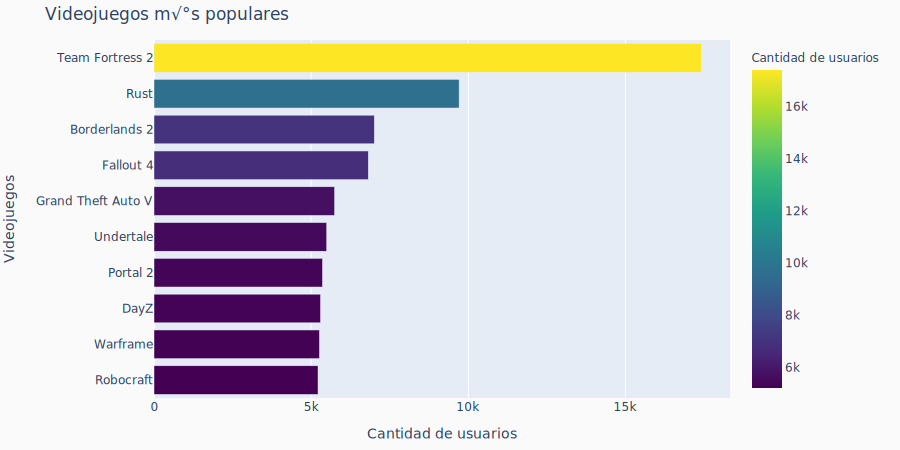

In [129]:
fig = px.bar(top10.sort_values(by='amount'), y='app_name', x='amount', color='amount', title='Videojuegos m√°s populares',
             color_continuous_scale='viridis',
             labels={'app_name': 'Videojuegos',
                     "amount": 'Cantidad de usuarios'},
             hover_data=HOVER_DATA_COLUMNS,
             width=900,
             height=450
             )
fig.update_layout(paper_bgcolor='#FAFAFA',
                  margin=dict(l=20, r=20, t=40, b=50)
                  )
display(SVG(fig.to_image(format='svg')))

#### El resultado que nos muestra ahora es muy aproximado a la consideraci√≥n preliminar

In [130]:
del top10

#### Videojuegos con registro de m√°s tiempo de juego

In [131]:
hours_by_productId = data_reviews.groupby('product_id', as_index=False).hours.sum()

reviews_games_hours = pd.merge(hours_by_productId, data_games, left_on='product_id',
                               right_on='id').sort_values(by='hours', ascending=False)

hours10 = reviews_games_hours.head(10).sort_values(by='hours')

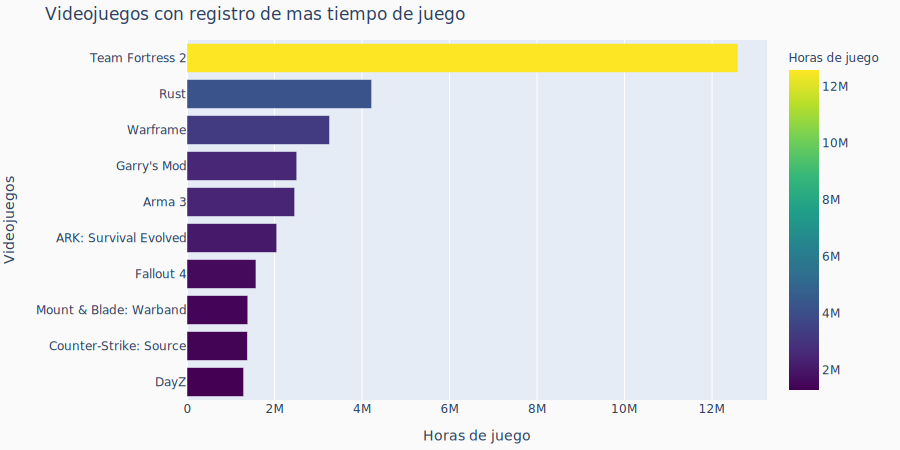

In [132]:
fig = px.bar(data_frame=hours10, y='app_name', x='hours', color='hours', title='Videojuegos con registro de mas tiempo de juego',
             color_continuous_scale='viridis',
             labels={'app_name': 'Videojuegos', "hours": 'Horas de juego'},
             hover_data=HOVER_DATA_COLUMNS,
             width=900,
             height=450
             )

fig.update_layout(paper_bgcolor='#FAFAFA',
                  margin=dict(l=20, r=20, t=40, b=10)
                  )
display(SVG(fig.to_image(format='svg')))

In [133]:
#Liberando memoria
del hours_by_productId, reviews_games_hours, hours10

##### G√©nero m√°s popular

In [134]:
all_genres = list(itertools.chain(*data_games.genres))
value, count = np.unique(all_genres, return_counts=True)
order = np.argsort(count)

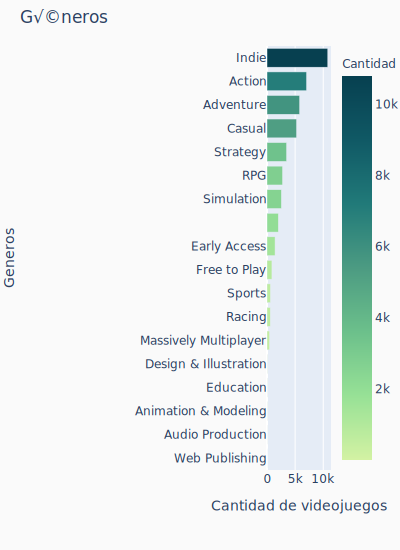

In [135]:
fig = px.bar(x=count[order], y=value[order], color=count[order],
             color_continuous_scale='emrld',
             title='G√©neros',
             labels={
                 'x': 'Cantidad de videojuegos',
                 'y': 'Generos', 'color': 'Cantidad'},
             width=400,
             height=550,
             # log_x=True,
             )
fig.update_layout(paper_bgcolor='#FAFAFA',
                  margin=dict(l=20, r=20, t=2)
                  )
display(SVG(fig.to_image(format='svg')))

#### Videojuegos de pago mas jugados

In [136]:
df_items = data_games.query('category_price=="paid"')
merge_paid_games = pd.merge(amount_by_productId, df_items, left_on='product_id',
                            right_on='id').sort_values(by='amount', ascending=False).head(10)

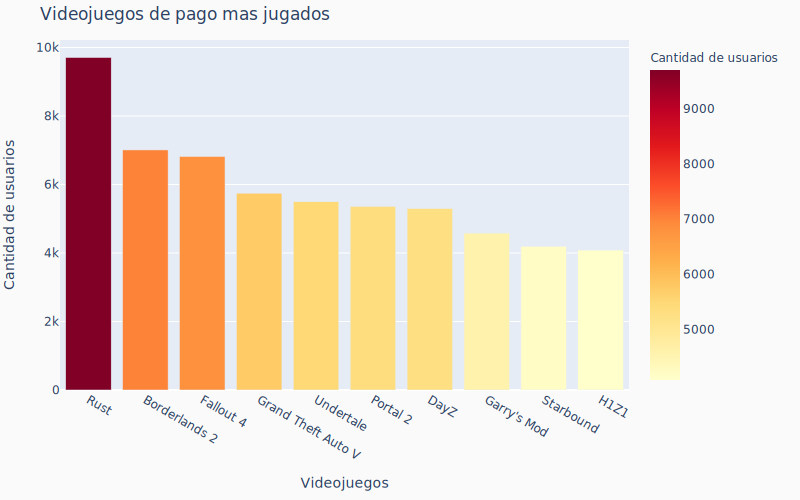

In [137]:
fig = px.bar(data_frame=merge_paid_games, x='app_name', y='amount', title='Videojuegos de pago mas jugados',
             labels={'app_name': 'Videojuegos',
                     'amount': 'Cantidad de usuarios'},
             hover_data=HOVER_DATA_COLUMNS,
             color=merge_paid_games.amount, color_continuous_scale='ylorrd',
             width=800,
             height=500
             )

fig.update_layout(paper_bgcolor='#FAFAFA',
                  margin=dict(l=30, r=20, t=40, b=30)
                  )
display(SVG(fig.to_image(format='svg')))

In [138]:
del merge_paid_games

#### Videojuegos gratis mas jugados

In [139]:
df_items = data_games.query('category_price=="free"')
merge_free_games = pd.merge(amount_by_productId, df_items, left_on='product_id',
                            right_on='id').sort_values(by='amount', ascending=False).head(10)

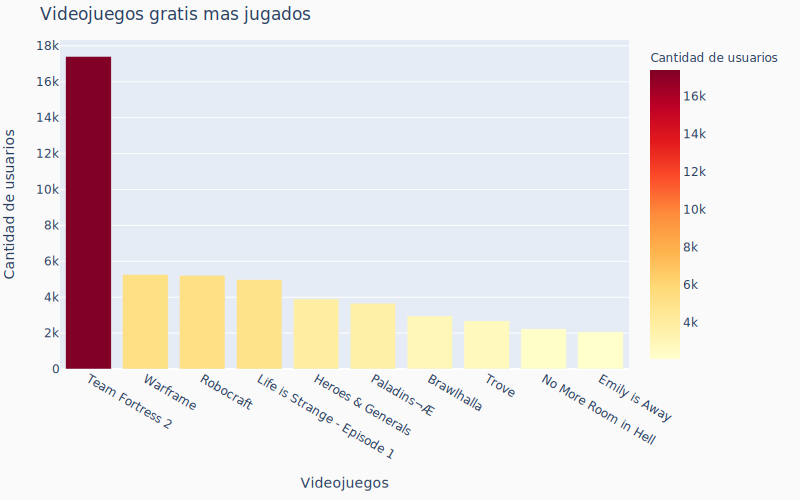

In [140]:
fig = px.bar(data_frame=merge_free_games, x='app_name', y='amount', title='Videojuegos gratis mas jugados',
             labels={'app_name': 'Videojuegos',
                     'amount': 'Cantidad de usuarios', 'color': 'Cantidad'},
             hover_data=HOVER_DATA_COLUMNS,
             color=merge_free_games.amount, color_continuous_scale='ylorrd',
             width=800,
             height=500)

fig.update_layout(paper_bgcolor='#FAFAFA',
                  margin=dict(l=20, r=20, t=40, b=30)
                  )
display(SVG(fig.to_image(format='svg')))

In [141]:
del merge_free_games

#### Porcentaje de usuarios por precio de videojuego

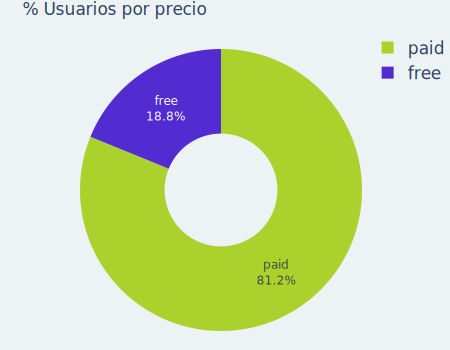

In [142]:
fig = px.pie(reviews_games_amount,
             names='category_price',
             values='amount',
             title='% Usuarios por precio',
             width=450,
             height=350,
             hole=0.4,
             color_discrete_sequence=('#AAD12C', '#532CD1'),
             labels={'category_price': 'Tipo Precio', 'amount': 'Cantidad'}
             )

fig.update_layout(
    margin=dict(t=30, b=0),
    legend=dict(font=dict(size=17)),
    paper_bgcolor='#edf2f4'
)
fig.update_traces(textposition='inside', textinfo='percent+label')
display(SVG(fig.to_image(format='svg')))

### Parte B - Modelo de Machine Learning

##### Se tendr√° en cuenta la premisa de que los Sistemas de Recomendaci√≥n intentan personalizar al m√°ximo lo que se le ofrecer√° a cada usuario, en el caso particular de estos datasets la recomendaci√≥n se basar√° en que tan popular es un videojuego

#### Usuarios nuevos

In [143]:
def plot_table(df):
    COLUMNS_FOR_USER = ['app_name', 'url', 'category_price']
    fig = go.Figure(go.Table(
        header=dict(values=['Videojuego', 'Sitio web', 'Tipo de precio'],
                    fill_color='#84C374',
                    font=dict(size=13)),
        cells=dict(values=np.vstack(df[COLUMNS_FOR_USER].values).T,
                   fill_color='#B374C3',
                   line_color='black',
                   line_width=.4,
                   font=dict(color='#f1faee'),
                   height=30),
        columnwidth=[1.5, 4, 1]))

    fig.update_layout(width=1000, height=370, margin=dict(t=10, b=0, l=0))
    return display(SVG(fig.to_image('svg')))

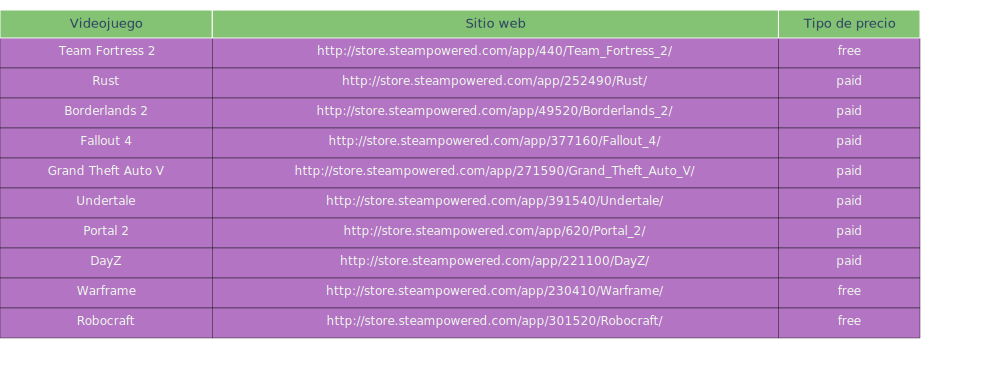

In [144]:
plot_table(reviews_games_amount.head(10))

#### Benchmark

In [145]:
def get_popularity_recommendations(username, top=10):
    df_recs = reviews_games_amount[~reviews_games_amount.id.isin(
        data_reviews.query('username==@username').product_id)]
    plot_table(df_recs.head(top))

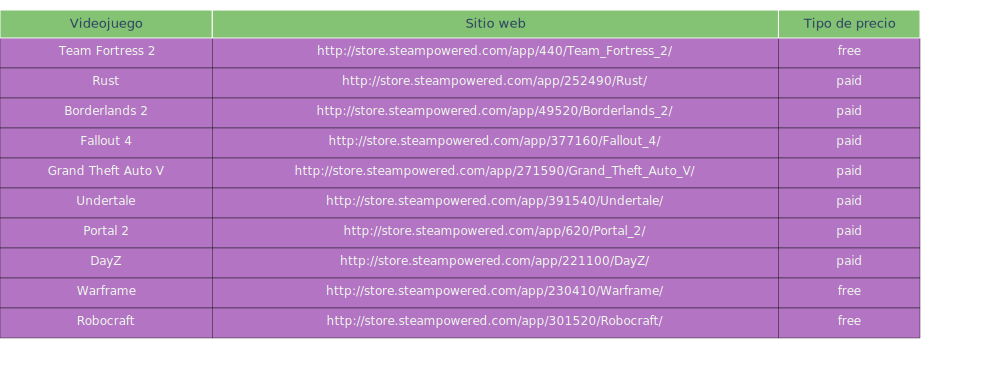

In [146]:
get_popularity_recommendations('backsea')

#### Filtro Colaborativo

##### Utilizaremos las Matrices de Factorizaci√≥n muy √∫tiles para aproximar valoraciones impl√≠citas
* Usaremos la librer√≠a implicit para m√≠nimos cuadrados

In [147]:
from implicit.als import AlternatingLeastSquares
from implicit.evaluation import ranking_metrics_at_k
from implicit.evaluation import train_test_split
from scipy import sparse

In [148]:
# Merge data_reviews y data_games
reviews_games = pd.merge(data_reviews, data_games[['id', 'category_price']],
                        left_on='product_id',
                        right_on='id',
                        how='left')

In [149]:
reviews_games.head()

username  hours  product_id       date  \
0                  backsea   30.0      218230 2018-01-05   
1                   RaZman    2.2      501300 2018-01-05   
2                Mike Dieu    1.5      367580 2018-01-05   
3  Sqeep The Screamin Frog   13.2      359550 2018-01-05   
4                lulatic13    6.7      327690 2018-01-05   

                                                text      id category_price  
0  this game is good dont get me wrong i would li...  218230           free  
1  Beautifully narrated story about a peculiar fa...  501300           paid  
2  70 min to finish it, zen ambiance but still ch...  367580           paid  
3  One of the best tactic games of all time . Tak...  359550           paid  
4  a very fun game, with nice character designs a...  327690           free

In [150]:
reviews_games.shape

(759235, 7)

In [151]:
# Convirtiendo a variable categ√≥rica
reviews_games['event'] = reviews_games['category_price'].astype(
    'category').cat.codes.astype(float)
reviews_games['user_code'] = reviews_games['username'].astype(
    'category').cat.codes

In [152]:
print(reviews_games.dtypes)

username                  object
hours                    float64
product_id                 int64
date              datetime64[ns]
text                      object
id                         int64
category_price            object
event                    float64
user_code                  int32
dtype: object


In [153]:
# Matriz de dispersi√≥n item-usuario y usuario-item
sparse_item_user = sparse.csr_matrix((reviews_games['hours'], (reviews_games['product_id'], reviews_games['user_code'])))
sparse_user_item = sparse.csr_matrix((reviews_games['hours'], (reviews_games['user_code'], reviews_games['product_id'])))

In [154]:
# Creando el modelo
model = AlternatingLeastSquares(factors=20, regularization=0.1, iterations=40)

In [155]:
alpha_val = 40
data_conf = (sparse_item_user * alpha_val).astype('double')

In [156]:
#  datos de entrenamiento y validaci√≥n
train, test = train_test_split(data_conf, .7)

In [157]:
print('Shape:', train.getnnz(), test.getnnz())

Shape: 530942 228201


In [158]:
# Entrenar el modelo
model.fit(train)

#### Realizando las recomendaciones

In [159]:
#Usuario de prueba "backsea"
reviews_games.query('username=="backsea"').iloc[0]

username                                                    backsea
hours                                                            30
product_id                                                   218230
date                                            2018-01-05 00:00:00
text              this game is good dont get me wrong i would li...
id                                                           218230
category_price                                                 free
event                                                             0
user_code                                                    402468
Name: 0, dtype: object

In [160]:
user_id =  402468    #User_code backsea
recommended = model.recommend(user_id, sparse_user_item)
print(recommended)

[(221910, 0.648595), (242050, 0.6168986), (200710, 0.6112294), (215530, 0.5667082), (250760, 0.5248998), (207610, 0.50270736), (41500, 0.45422643), (249050, 0.4460891), (24740, 0.43829203), (261030, 0.434398)]


##### El resultado es el id del item y la calificacion implicita calculada por la librer√≠a

In [161]:
ids = [i[0] for i in recommended]
ids

[221910, 242050, 200710, 215530, 250760, 207610, 41500, 249050, 24740, 261030]

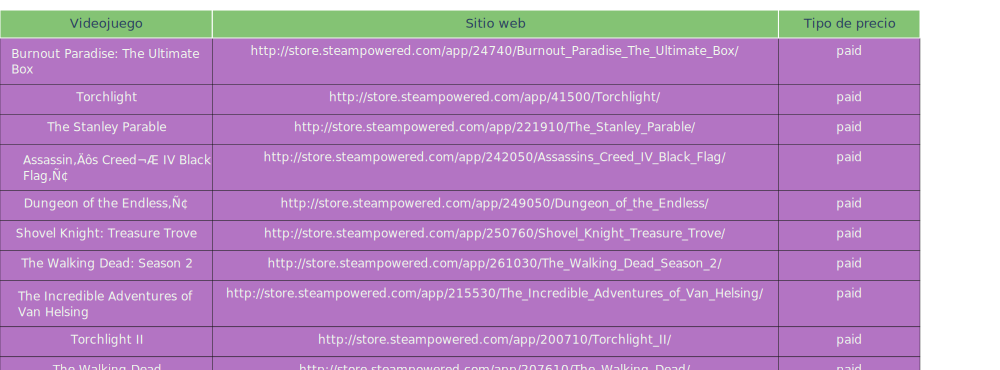

In [162]:
plot_table(data_games.query('id in @ids'))

#####  El resultado de la lista es diferente al Benchmark

In [163]:
# Items similares del usuario
reviews_games.query('user_code==@user_id').head(3)

username  hours  product_id       date  \
0       backsea   30.0      218230 2018-01-05   
127749  backsea    6.4      264240 2017-07-19   

                                                     text      id  \
0       this game is good dont get me wrong i would li...  218230   
127749  just appered in my steam library good game though  264240   

       category_price  event  user_code  
0                free    0.0     402468  
127749           paid    1.0     402468

[218230, 686200, 299800, 209000, 527810, 458700, 290730, 731920, 429790, 269710]


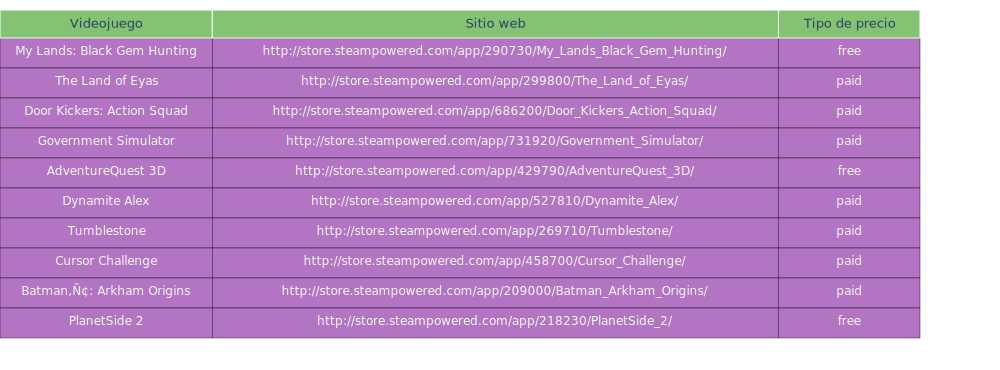

In [164]:
# Videojuegos similares columna id
item_id = 218230
ids = [i[0] for i in model.similar_items(item_id)]
print(ids)
plot_table(data_games.query('id in @ids'))

### -Parte C - Investigaci√≥n

##### Realizaremos un an√°lisis adicional usando matriz de factorizaci√≥n con LightFM

#### Matriz de Factorizaci√≥n con LightFM

###### LightFM una librer√≠a que utiliza los algoritmos de perdida WARP (Weighted Approximate-Rank Pairwise y BPR (Bayesian Personalised Ranking) con el fin de crear truplas (usuario, √≠tem positivo, √≠tem negativo) con el fin de estimar las preferencias desconocidas. Adem√°s hace posible combinar metadatos dentro de sistemas colaborativos.

In [165]:
# Instalar librer√≠a
# !pip install lightfm

In [166]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, auc_score, recall_at_k
from lightfm.cross_validation import random_train_test_split
from lightfm.data import Dataset

C:\Anaconda\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning:

LightFM was compiled without OpenMP support. Only a single thread will be used.



In [167]:
# Preparamos datos de validaci√≥n y entrenamiento
data_reviews['user_code'] = data_reviews.username.astype('category').cat.codes

In [168]:
data_reviews.rename(columns={'user_code': 'user_id',
                             'product_id': 'item_id', 'hours': 'weight'}, inplace=True)

In [169]:
data_reviews.columns

Index(['username', 'weight', 'item_id', 'date', 'text', 'user_id'], dtype='object')

In [170]:
data_interactions = Dataset()
data_interactions.fit(
    users=data_reviews['user_id'], items=data_reviews['item_id'], )

In [171]:
interactions, weights = data_interactions.build_interactions(
    data_reviews[['user_id', 'item_id', 'weight']].values)

In [172]:
random_state_interactions = np.random.RandomState(seed=42)
train, test = random_train_test_split(
    interactions, test_percentage=.2, random_state=random_state_interactions)

In [173]:
random_state_weights = np.random.RandomState(seed=42)
train_weights, test_weights = random_train_test_split(
    interactions=weights, test_percentage=.2, random_state=random_state_weights)

In [174]:
print('Shapes:', train.getnnz(), test.getnnz())

Shapes: 607388 151847


In [175]:
# Crear modelo
lightFM = LightFM(loss='logistic')

In [176]:
# Entrenar el modelo
lightFM.fit(train, sample_weight=train_weights,
            verbose=True, epochs=30, num_threads=4)

Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:39<00:00,  1.33s/it]


In [177]:
# Evaluar el modelo
precision_at_k = precision_at_k(
    lightFM, test_interactions=test, train_interactions=train).mean()

print('Precision at k: %.7f' % precision_at_k)

Precision at k: 0.0001543


In [178]:
auc_score = auc_score(lightFM, test_interactions=test,
                      train_interactions=train).mean()


print('AUC Score: %.7f' % auc_score)

AUC Score: 0.7904246


In [179]:
# Generar las recomendaciones
def get_recommendations(model, interactions, user_id, n=10):
    n_users, n_items = interactions.shape
    all_scores = np.empty(shape=(0, n_items))
    
    # Adquiriendo calificaciones
    scores = model.predict(user_ids=user_id, item_ids=np.arange(n_items))
    all_scores = np.vstack((all_scores, scores))
    item_averages = np.mean(all_scores.astype(np.float), axis=0)
    
    # Asociando a items
    top_items_for_group = data_reviews.item_id.loc[np.argsort(-item_averages)][:n]
    return top_items_for_group

In [180]:
# Consultar recomendaciones para usuario de prueba
data_reviews.query('username=="backsea"').iloc[0]

username                                              backsea
weight                                                     30
item_id                                                218230
date                                      2018-01-05 00:00:00
text        this game is good dont get me wrong i would li...
user_id                                                402468
Name: 0, dtype: object

In [181]:
items_id = get_recommendations(lightFM, interactions, 402468)
items_id

2239    674940
6694    342310
1057    509000
7823    460920
6948    337000
4071    290930
2862      8930
1731       440
1102    210970
1643    466560
Name: item_id, dtype: int64

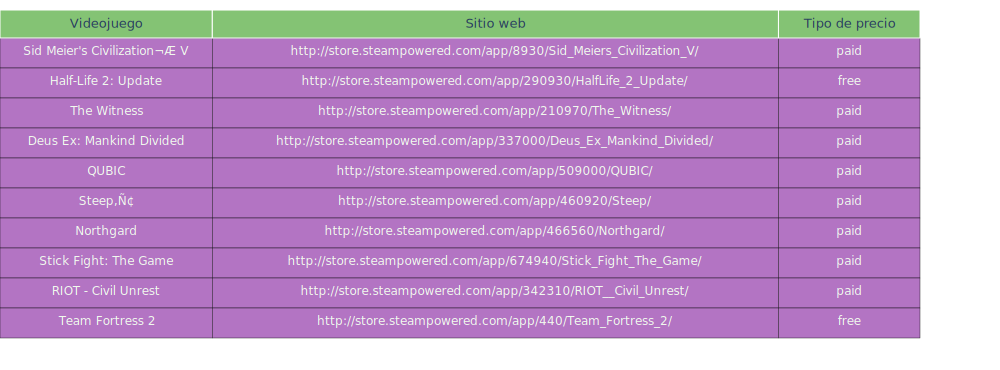

In [182]:
plot_table(data_games.query('id in @items_id'))

## Conclusiones

###### Un sistema de recomendaci√≥n compara el perfil de usuarios con caracter√≠sticas de los √≠tems y predictivamente intenta identificar la calificaci√≥n que este le dar√≠a. Estas caracter√≠sticas pueden ser dadas por el mismo √≠tem o inferidas impl√≠citamente a trav√©s del contexto que dan otros usuarios.

###### Los datasets disponibles en este proyecto presentan grandes retos ya que est√°n basados principalmente en comentarios de usuario y horas de uso sin una calificaci√≥n directa sobre la experiencia del producto (ratings); adicionalmente se debe tener en cuenta que m√°s del 80 % de los comentarios de los usuarios acerca de los productos est√°n sobre los productos de pago de lo cu√°l se infiere que de la mayor√≠a de los juegos gratuitos no est√°n recibiendo registros (filtrados) suficientes ya que es bien conocido que los juegos gratuitos tienen mayores descargas en las diferentes plataformas.

###### Las librer√≠as que implementan m√©tricas de clasificaci√≥n son las recomendadas en los sistemas de recomendaci√≥n.

###### De los dos modelos utilizados seleccionamos el LigthFM con base a su AUC.

* ¬øC√≥mo har√≠as para ponerle un valor a la calificaci√≥n?

###### Volvamos al dataset inicial ya que se cre√≠a que la columna `found_funny` por su nombre ser√≠a determinante, pero no hay consistencia y muchos valores faltantes de dicha columna, por lo tanto el planteamiento llevado a cabo con relaci√≥n al mayor n√∫mero de reviews y horas fue acertado cuando no hay una calificaci√≥n directa del producto.


In [185]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

In [186]:
data_reviews = pd.DataFrame(data_reviews)

In [188]:
data_reviews.found_funny.value_counts()

1.0       70119
2.0       19612
3.0        8487
4.0        4859
5.0        2909
          ...  
1070.0        1
1075.0        1
270.0         1
1094.0        1
511.0         1
Name: found_funny, Length: 634, dtype: int64

In [192]:
valores = data_reviews[(data_reviews['found_funny']<=10)]

Valores totales:  779307
Valores faltantes:  659143


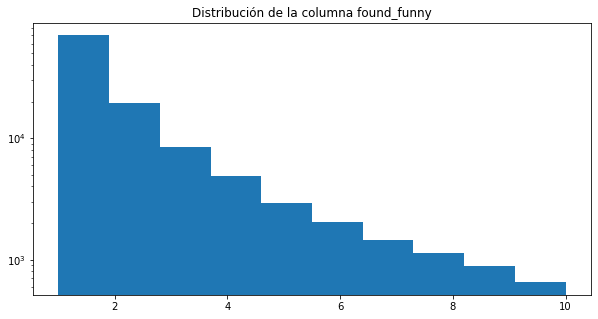

In [193]:
plt.figure(figsize=(10,5))
plt.hist(valores['found_funny'])
plt.yscale('log')
plt.title('Distribuci√≥n de la columna found_funny')
plt.show

print('Valores totales: ',len(data_reviews))
print('Valores faltantes: ', data_reviews.found_funny.isna().sum() )

* ¬øHay algo que te gustar√≠a investigar o probar?

##### Al igual que muchos otros sistemas de recomendaci√≥n vigentes y muy conocidos como el de Netflix se establecer√≠an la automatizaci√≥n de las encuestas a los usuarios sobre las sugerencias planteadas para validar (contrastar) en que porcentaje estuvo acertado el modelo.

### Art√≠culos y referencias de inter√©s consultados

https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe

https://implicit.readthedocs.io/en/latest/

https://medium.com/@jjlovesstudying/python-cuda-set-up-on-windows-10-for-gpu-support-78126284b085

https://towardsdatascience.com/how-to-build-a-movie-recommender-system-in-python-using-lightfm-8fa49d7cbe3b

https://towardsdatascience.com/solving-business-usecases-by-recommender-system-using-lightfm-4ba7b3ac8e62

https://www.kaggle.com/camiloemartinez/sistemas-de-recomendacion-con-surprise-y-lightfm

https://www.geeksforgeeks.org/running-python-script-on-gpu/

https://medium.com/@jonduke90/analyzing-steam-reviews-and-users-data-7a4ff3c5ce1a